In [121]:
import numpy as np
import pandas as pd

In [122]:
dict_1 = {'name': ['Cong','Chi','Phuong'],
          'age': [26,2,26],
          'university': ['AOF', 'NB','AOF']}
df2 = pd.DataFrame(dict_1)
df2

,name,age,university
0,Cong,26,AOF
1,Chi,2,NB
2,Phuong,26,AOF


In [187]:
%config Completer.use_jedi = False

In [124]:
series = df.name #Series, chỉ có một cột dữ liệu duy nhất
series

0      Cong
1       Chi
2    Phuong
Name: name, dtype: object

In [125]:
df1 = pd.DataFrame(np.linspace(1,20,20).reshape(5,4), dtype = int,
                   index=range(1,6),
                   columns=[f'col_{i}'for i in range(1,5)])
df1

,col_1,col_2,col_3,col_4
1,1,2,3,4
2,5,6,7,8
3,9,10,11,12
4,13,14,15,16
5,17,18,19,20


### 2. Indexing

In [126]:
import seaborn as sns

In [127]:
tip_df = sns.load_dataset('tips') #thêm data mẫu từ internet trên seaborn ở github (file tips)
tip_df.index = [f'index_{i}' for i in range(tip_df.shape[0])]
tip_df.head(8)

,total_bill,tip,sex,smoker,day,time,size
index_0,16.99,1.01,Female,No,Sun,Dinner,2
index_1,10.34,1.66,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
index_6,8.77,2.00,Male,No,Sun,Dinner,2
index_7,26.88,3.12,Male,No,Sun,Dinner,4


**Slicing**
- loc: df.loc[row_label, column_label] --> series.loc[row_label]
- iloc: df.iloc[row_index, column_index] --> series.iloc[row_index]
    
**Cell values**
- at: df.at[row_label, column_lable]
- iat: df.iat[row_index, column_index]

In [128]:
tip_df.loc[['index_0']]

,total_bill,tip,sex,smoker,day,time,size
index_0,16.99,1.01,Female,No,Sun,Dinner,2


In [129]:
tip_df.loc['index_0']

total_bill     16.99
tip             1.01
               ...  
time          Dinner
size               2
Name: index_0, Length: 7, dtype: object

In [130]:
tip_df.iloc[0:6,0:4]

,total_bill,tip,sex,smoker
index_0,16.99,1.01,Female,No
index_1,10.34,1.66,Male,No
...,...,...,...,...
index_4,24.59,3.61,Female,No
index_5,25.29,4.71,Male,No


In [131]:
tip_df.loc['index_0':'index_5', ['total_bill','sex']]

,total_bill,sex
index_0,16.99,Female
index_1,10.34,Male
...,...,...
index_4,24.59,Female
index_5,25.29,Male


In [132]:
tip_df.iloc[0:6, [0,-5]]

,total_bill,sex
index_0,16.99,Female
index_1,10.34,Male
...,...,...
index_4,24.59,Female
index_5,25.29,Male


In [133]:
series = tip_df.total_bill
series.head(5)

index_0    16.99
index_1    10.34
index_2    21.01
index_3    23.68
index_4    24.59
Name: total_bill, dtype: float64

In [134]:
series.iloc[2]

21.01

In [135]:
series.loc['index_2']

21.01

### 3. Masking (filtering)

In [136]:
pd.options.display.max_rows = 5
tip_df.head(2)

,total_bill,tip,sex,smoker,day,time,size
index_0,16.99,1.01,Female,No,Sun,Dinner,2
index_1,10.34,1.66,Male,No,Sun,Dinner,3


In [137]:
tip_df[tip_df.sex =='Male']

,total_bill,tip,sex,smoker,day,time,size
index_1,10.34,1.66,Male,No,Sun,Dinner,3
index_2,21.01,3.50,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
index_241,22.67,2.00,Male,Yes,Sat,Dinner,2
index_242,17.82,1.75,Male,No,Sat,Dinner,2


In [138]:
tip_df.query("sex == 'Male'")

,total_bill,tip,sex,smoker,day,time,size
index_1,10.34,1.66,Male,No,Sun,Dinner,3
index_2,21.01,3.50,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
index_241,22.67,2.00,Male,Yes,Sat,Dinner,2
index_242,17.82,1.75,Male,No,Sat,Dinner,2


In [139]:
conditions = (tip_df.sex == 'Male') & (tip_df.smoker == 'No') & (tip_df.day == 'Sun')
tip_df[conditions]

,total_bill,tip,sex,smoker,day,time,size
index_1,10.34,1.66,Male,No,Sun,Dinner,3
index_2,21.01,3.50,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
index_167,31.71,4.50,Male,No,Sun,Dinner,4
index_185,20.69,5.00,Male,No,Sun,Dinner,5


In [140]:
tip_df.query("sex == 'Male' & smoker == 'No' & day == 'Sun'")

,total_bill,tip,sex,smoker,day,time,size
index_1,10.34,1.66,Male,No,Sun,Dinner,3
index_2,21.01,3.50,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
index_167,31.71,4.50,Male,No,Sun,Dinner,4
index_185,20.69,5.00,Male,No,Sun,Dinner,5


In [145]:
tip_df.groupby('sex').total_bill.mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [152]:
tip_df['total'] = tip_df['total_bill'] + tip_df['tip']
tip_df.groupby('sex').total.mean()

sex
Male      23.833694
Female    20.890345
Name: total, dtype: float64

In [162]:
tip_df.groupby(['sex','smoker'])[['total_bill','tip']].mean()

total_bill       tip
sex    smoker                      
Male   Yes      22.284500  3.051167
       No       19.791237  3.113402
Female Yes      17.977879  2.931515
       No       18.105185  2.773519

In [164]:
tip_df.groupby(['sex','smoker']).agg(mean_total_bill = ('total_bill', 'mean'),
                          max_total_bill = ('total_bill','median'),
                          mean_tip = ('tip','mean'))

mean_total_bill  max_total_bill  mean_tip
sex    smoker                                           
Male   Yes           22.284500           20.39  3.051167
       No            19.791237           18.24  3.113402
Female Yes           17.977879           16.27  2.931515
       No            18.105185           16.69  2.773519

In [148]:
tip_df.groupby('sex').agg({'total_bill':['mean','max','median'], 'tip': ['mean','max','count']})

total_bill                     tip            
             mean    max median      mean   max count
sex                                                  
Male    20.744076  50.81  18.35  3.089618  10.0   157
Female  18.056897  44.30  16.40  2.833448   6.5    87

#### 5.2. Pivot

In [165]:
tip_df.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

In [167]:
tip_df.day.nunique()

4

In [166]:
tip_df.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']

In [168]:
tip_df.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [182]:
tip_df.pivot_table(values='total_bill', index='day', columns='time', aggfunc='sum')

time,Lunch,Dinner
day,,
Thur,1077.55,18.78
Fri,89.92,235.96
Sat,0.00,1778.40
Sun,0.00,1627.16


<AxesSubplot:xlabel='day'>

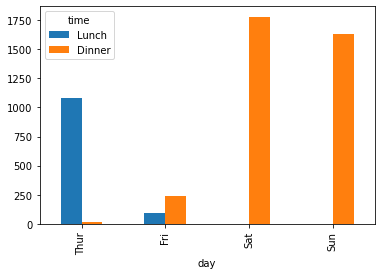

In [183]:
tip_df.pivot_table(values='total_bill', index='day', columns='time', aggfunc='sum').plot(kind='bar')

#### 5.3. Other operations

In [184]:
tip_df.head(3)

,total_bill,tip,sex,smoker,day,time,size,total
index_0,16.99,1.01,Female,No,Sun,Dinner,2,18.00
index_1,10.34,1.66,Male,No,Sun,Dinner,3,12.00
index_2,21.01,3.50,Male,No,Sun,Dinner,3,24.51


In [190]:
tip_df.sort_values('total', ascending=False, inplace=True)
tip_df

,total_bill,tip,sex,smoker,day,time,size,total
index_170,50.81,10.0,Male,Yes,Sat,Dinner,3,60.81
index_212,48.33,9.0,Male,No,Sat,Dinner,4,57.33
...,...,...,...,...,...,...,...,...
index_92,5.75,1.0,Female,Yes,Fri,Dinner,2,6.75
index_67,3.07,1.0,Female,Yes,Sat,Dinner,1,4.07
